In [1]:
# Importing Pandas Library 
import pandas as pd

In [2]:
# Create Dataframe from diabetes CSV file
df = pd.read_csv('diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Análise Exploratória e Tratamento dos Dados**

In [3]:
# Rename DataFrame columns 
df.rename(columns={0:'Gravidez', 1:'Glicose', 2: 'Pressão', 3: 'Dobra', 4: 'Insulina', 5: 'IMC', 6: 'Genética', 7: 'Idade', 8:'Diabetes'}, inplace=True)
df.head()

,Gravidez,Glicose,Pressão,Dobra,Insulina,IMC,Genética,Idade,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# DataFrame data types analysis 
df.dtypes

Gravidez      int64
Glicose       int64
Pressão       int64
Dobra         int64
Insulina      int64
IMC         float64
Genética    float64
Idade         int64
Diabetes      int64
dtype: object

In [5]:
# DataFrame size 
df.shape

(768, 9)

Na base existe um total de 768 mulheres. Não é um número necessariamente baixo, mas precisamos avaliar se alguns registros precisarão ser deletados para melhorar a análise. De toda forma é uma quantidade considerável de dados.

In [6]:
# Dataframe missing values analysis
df.isna().sum()

Gravidez    0
Glicose     0
Pressão     0
Dobra       0
Insulina    0
IMC         0
Genética    0
Idade       0
Diabetes    0
dtype: int64

Por se tratar de uma base de dados já pronta, o tratamento dos dados faltantes (missing values) já foi realizado, mas de forma equivocada em alguns casos. Os missing values foram trocados por 0, o que pode caisar algumas distorções.

In [7]:
# Evaluating features general correlation
df.corr()

,Gravidez,Glicose,Pressão,Dobra,Insulina,IMC,Genética,Idade,Diabetes
Gravidez,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glicose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pressão,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Dobra,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulina,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
IMC,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Genética,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Idade,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
# DataFrame general statistics
df.describe()

,Gravidez,Glicose,Pressão,Dobra,Insulina,IMC,Genética,Idade,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Gravidez**: Aparentemente tem distribuição normal, mas com uma variância muito grande. O valor máximo como 17 não é impossível, mas pode estar distorcido da maioria. Deve ser avaliado.	
**Glicose**: Distribuição normal (média e mediana parecidas) e aparentemente o único problema são os valores zero.	
**Pressão**: Distribuição normal, o problema são os valores zero.		
**Dobra**: Distribuição normal, um problema são os valores zero.	
**Insulina**: Distribuição muito estranha. Presica ser melhor avaliado.	
**IMC**: Distribuição normal, o problema são os valores zero.			
**Genética**: Distribuição parece normal, apesar da grande variância. Maior problema são valores aima de 1.	
**Idade**: Distribuição normal, aparentement tudo certo.	
**Diabetes**: Deve ser avaliada a distribuição de cada classe.

In [9]:
# Handling missing values (value = 0) 
import numpy as np
df.Glicose.replace(0,np.nan,inplace = True)
df.Pressão.replace(0,np.nan,inplace = True)
df.Dobra.replace(0,np.nan,inplace = True)
df.IMC.replace(0,np.nan,inplace = True)

# Fill NAN with mean in each column
df.Glicose.fillna(df.Glicose.mean(), inplace=True)
df.Pressão.fillna(df.Pressão.mean(), inplace=True)
df.Dobra.fillna(df.Dobra.mean(), inplace=True)
df.IMC.fillna(df.IMC.mean(), inplace=True)

In [10]:
# Gravidez
df.Gravidez.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Gravidez, dtype: int64

In [11]:
# Drop low frequency cases
df.loc[df['Gravidez'] > 10, 'Gravidez'] = 11
df.shape

(768, 9)

In [12]:
df.Gravidez.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
11     34
9      28
10     24
Name: Gravidez, dtype: int64

<AxesSubplot:>

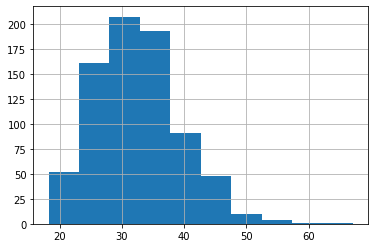

In [13]:
# Índice de Massa Corporal 
import matplotlib 
df.IMC.hist()

<AxesSubplot:>

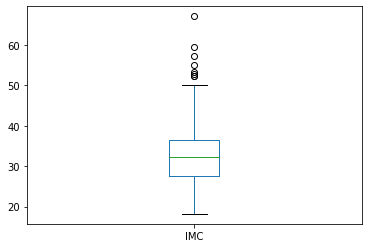

In [14]:
# Os valores abaixo de 10 e acima de 60 causam um disturbio grande na distribuição
df.IMC.plot.box()

In [15]:
# Drop outliers cases
df = df.loc[df.IMC <= 50]
df.shape

(760, 9)

<AxesSubplot:>

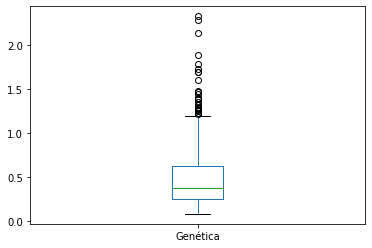

In [16]:
# Genética 
df.Genética.plot.box()

In [17]:
# A hereditariedade máxima possível é 1. Dessa forma, todos os valores acima de 1 serão considerados 1
df.loc[df['Genética'] > 1, 'Genética'] = 1

In [18]:
# Distribution of Diabetes event
df.Diabetes.value_counts(normalize=True)*100

0    65.526316
1    34.473684
Name: Diabetes, dtype: float64

**A classe alvo está muito desbalanceada, vou utilizar o modelo Decision Tree em uma tentativa de solucionar o problema. Mas outros modelos, que lidem melhor com desbalanceamento de classe devem ser avaliados.**

# **Construção do Modelo e Previsão**

In [49]:
# Assign variables to Train and Test slices
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)  
y = df['Diabetes']


# Dataframe to Train and Test slices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [50]:
# Rescaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
#  Building a baseline to compare model tuning
from sklearn.tree import DecisionTreeClassifier
base_tree = DecisionTreeClassifier()
base_tree.fit(X_train, y_train)
y_base = base_tree.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_base)

0.5433526011560693

# **Validação Cruzada e Tuning do Modelo**

In [62]:
# Cross Validation and Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
clf_tree = DecisionTreeClassifier()
parametros = {'max_depth':[4, 6, 8, 10, 11, 12, 13, 15], 'min_samples_split':[0.1, 0.2, 2, 4, 5, 7, 10, 11, 14], 'criterion': ['gini', 'entropy'], 'class_weight': ['balanced']}
grid = GridSearchCV(estimator=clf_tree, param_grid=parametros, scoring='f1', cv=8)

In [63]:
# Training and Validating Model
grid.fit(X_train, y_train)
print(pd.DataFrame(grid.cv_results_)[['rank_test_score','mean_test_score']].sort_values('rank_test_score').head(5))
print(f'Melhores parâmetros: {grid.best_params_}')

     rank_test_score  mean_test_score
75                 1         0.686168
127                2         0.685246
109                2         0.685246
100                2         0.685246
91                 2         0.685246
Melhores parâmetros: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 4}


# **Evaluating Model Metrics**

In [64]:
# Traning Tuning Model
tuning_clf_tree = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=4, min_samples_split=4)
tuning_clf_tree.fit(X_train, y_train)
y_pred = base_tree.predict(X_test)

In [69]:
# Final Evaluation
from sklearn.metrics import confusion_matrix
print('Matriz de Confusão:') 
matriz = pd.DataFrame(confusion_matrix(y_test, y_pred))
print(matriz)

Matriz de Confusão:
     0   1
0  102  47
1   32  47


**Pelo fato do desbalanceamento da classe alvo, o modelo está incorrendo em muitos falsos negativos (devido a baixa sensibilidade)** 

In [70]:
from sklearn.metrics import classification_report
print('Classification Report do Modelo:')
print (classification_report(y_test, y_pred))

Classification Report do Modelo:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       149
           1       0.50      0.59      0.54        79

    accuracy                           0.65       228
   macro avg       0.63      0.64      0.63       228
weighted avg       0.67      0.65      0.66       228



# **Persistir o Modelo treinado e o Scaler**

In [71]:
# Save best model and scaler 
import joblib 
model_save = 'model.sav'
joblib.dump(tuning_clf_tree, model_save)
scaler_save = "scaler.sav"
joblib.dump(scaler, scaler_save)

['scaler.sav']